# Trabajo Practico semana 4bis
## Nicolas Pereyra
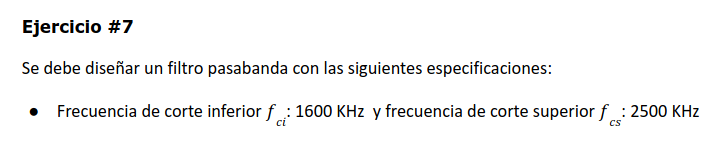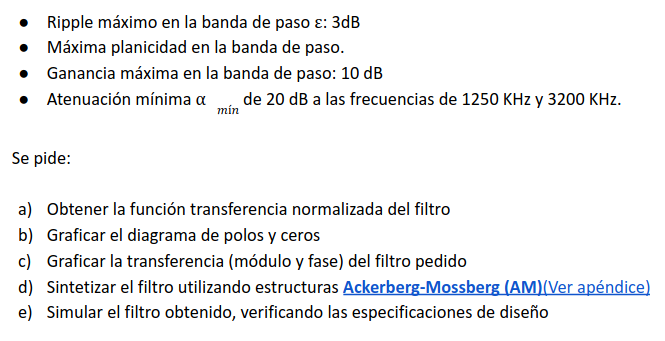

Filtro butterworth ($\epsilon = 1$)
### Nomalizacion de frecuencia:
$f_o = \sqrt{f_{p1}.f_{p2}}$  
  
| $f_{s1n}$   | $f_{p1n}$   | $f_{p2n}$   |$f_{s2n}$    |
|-------------|-------------|-------------|-------------|
|$\frac{5}{8}$|$\frac{4}{5}$|$\frac{5}{4}$|$\frac{8}{5}$|

### Nucleo de trasformacion:  
$k(s) = \frac{q}{w_o} \frac{s²+w_o²}{s} \Rightarrow k_n(s) = q \frac{s²+1}{s}$  
Siendo $q$ inversamente proporcional a $BW$ en caso de tomar a $w_o$ normalizada:  
$BW = f_{p2n}-f_{p1n} = \frac{9}{20}  \Rightarrow  q = \frac{20}{9}$

### Calculo que lado del pasa banda exige una mayor pendiente:
$k_n(w) = \frac{20}{9} \frac{w²-1}{w}$   
$k_n(w_{s1n}) = -2.166$  
$k_n(w_{s2n}) = 2.166$  
  
Dado que $|k_n(w_{s1n})| = |k_n(w_{s2n})|$ la exigencia por cada lado del filtro van a ser las mismas.  

### Calculo el orden del pasa bajos:
$n = \frac{log(\frac{10^{\alpha.min/10}-1}{\epsilon²})}{2.log(|k_n(w_{s1n})|)} \thickapprox
 3 $


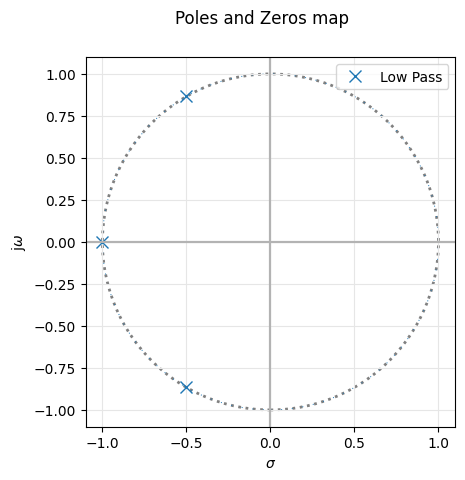

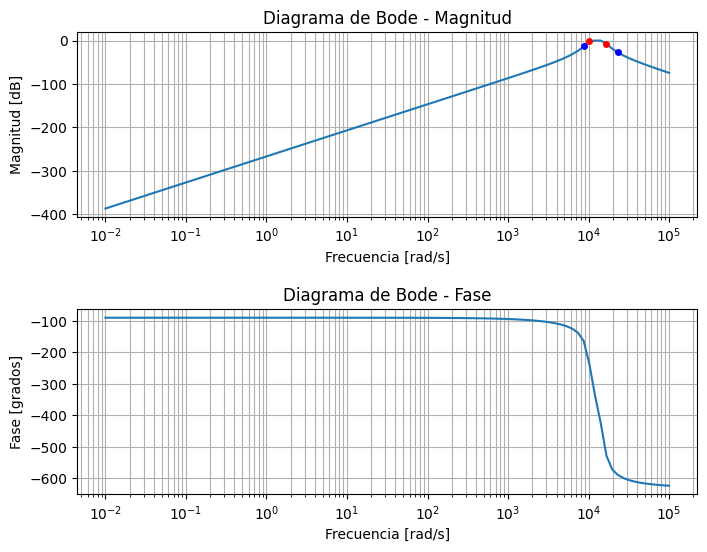

TransferFunctionContinuous(
array([1.80828606e+11, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
array([1.00000000e+00, 1.13097336e+04, 5.37696048e+08, 3.75275168e+12,
       8.49095565e+16, 2.82027741e+20, 3.93785014e+24]),
dt: None
)


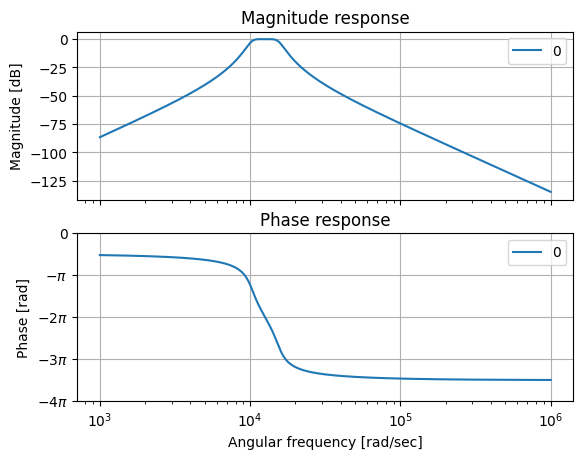

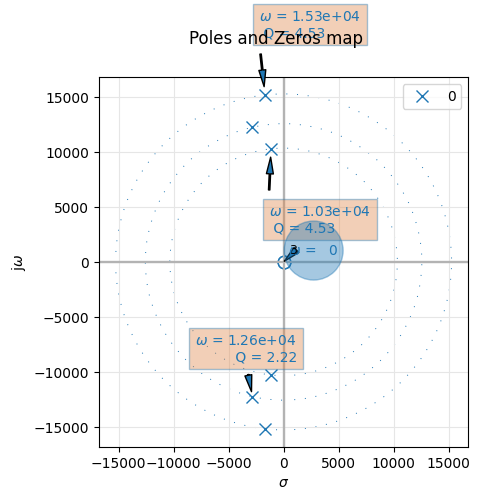

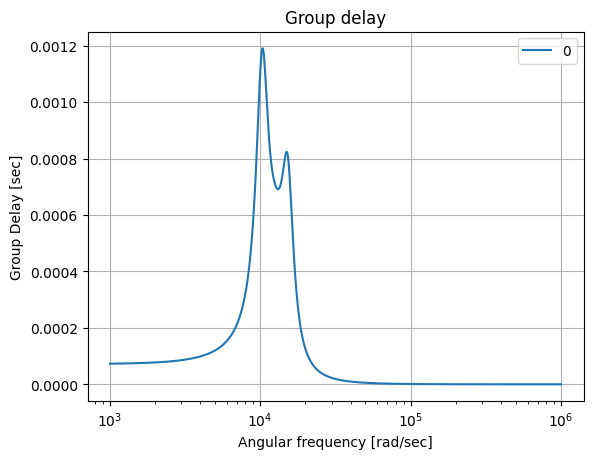

In [32]:
# Módulos externos

import sympy as sp
from sympy.abc import s

# Módulos externos
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from pytc2.sistemas_lineales import pzmap, bodePlot, tf2sos_analog, analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

n = 3
fs1 = 1250
fs2 = 3.2*10**3
fp1 = 1.6*10**3
fp2 = 2.5*10**3
fo = (fp1*fp2)**(1/2)

wo = 2*np.pi*fo
bw = (fp2-fp1)*2*np.pi

b, a = signal.butter(n, 1,analog=True, output='ba')
tf = signal.TransferFunction(b,a)
pzmap(tf, fig_id=1, filter_description  = "Low Pass") #S plane pole/zero plot

b, a = signal.lp2bp(b,a,wo,bw)
tf = signal.TransferFunction(b,a)

#q = tf2sos_analog(tf) NO ME FUNCIONO ESTA FUNCION
#--------------------------------------------------------------
# Generar el grillado de frecuencias
w, mag, phase = signal.bode(tf)

# Crear la figura y los subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.5)

# Graficar la magnitud en dB con grillado
ax1.semilogx(w, mag)
ax1.set_xscale('log')
ax1.set_xlabel('Frecuencia [rad/s]')
ax1.set_ylabel('Magnitud [dB]')
ax1.set_title('Diagrama de Bode - Magnitud')
ax1.grid(True, which="both")

# Marcar fp1
idx_1 = np.where(w >= (2*np.pi*fp1))[0][0]
mag_marker_1 = mag[idx_1]
ax1.plot(w[idx_1], mag[idx_1], 'ro', markersize=4)

# Marcar fp2
idx_2 = np.where(w >= (2*np.pi*fp2))[0][0]
mag_marker_2 = mag[idx_2]
ax1.plot(w[idx_2], mag[idx_2], 'ro', markersize=4)

# Marcar fs1
idx_3 = np.where(w >= (2*np.pi*fs1))[0][0]
mag_marker_3 = mag[idx_3]
ax1.plot(w[idx_3], mag[idx_3], 'bo', markersize=4)

# Marcar fs1
idx_4 = np.where(w >= (2*np.pi*fs2))[0][0]
mag_marker_4 = mag[idx_4]
ax1.plot(w[idx_4], mag[idx_4], 'bo', markersize=4)


# Graficar la fase en grados con grillado
ax2.semilogx(w, phase)
ax2.set_xscale('log')
ax2.set_xlabel('Frecuencia [rad/s]')
ax2.set_ylabel('Fase [grados]')
ax2.set_title('Diagrama de Bode - Fase')
ax2.grid(True, which="both")

# Mostrar la figura
plt.show()
analyze_sys(tf)
print(tf)


Desconpongo la funcion trasferencia de 6° a 3 trasferencias de 2°. Debido a que no me funciono la funcion t2sos_analog obtuve las trasferencias de 2° conociendo la ubicacion de los polos. Esto lo hice sabiendo que la funcion trasferencia de un funcion trasferencia se puedo escribir de la siguiente forma:  
$T(s) = \frac{s.\frac{w_n}{q}}{s²+\frac{w_n}{q}.s+w_n²}$  
  
Quedando nuestra funcion trasferencia equivalente de la siguiente forma:  
$T(s) = T1(s).T2(s).T3(s) = \frac{s.\frac{w_1}{q_1}}{s²+\frac{w_1}{q_1}.s+w:n²} \frac{s.\frac{w_2}{q_2}}{s²+\frac{w_2}{q_2}.s+w_2²} \frac{s.\frac{w_3}{q_3}}{s²+\frac{w_3}{q_3}.s+w_3²}$  
  
Siento los $w$ y los $q$ datos obtenidos de el diagrama de polos y ceros.  
$T1(s) = \frac{s.\frac{w_1}{q_1}}{s²+\frac{w_1}{q_1}.s+w_1²}= \frac{s.3.377.10³}{s²+3.377.10³.s+234.10⁶}$  
$T2(s) = \frac{s.\frac{w_2}{q_2}}{s²+\frac{w_2}{q_2}.s+w_2²}= \frac{s.2.273.10³}{s²+2.273.10³.s+106.10⁶}$  
$T3(s) = \frac{s.\frac{w_3}{q_3}}{s²+\frac{w_3}{q_3}.s+w_3²}= \frac{s.5.675.10³}{s²+5.675.10³.s+158.10⁶}$  



## Ackerberg Mossberg
### Transferencia:
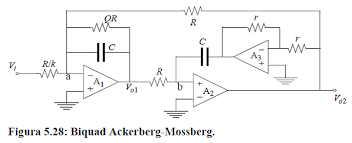

$H(s) = \frac{-s.\frac{k}{R.C}}{s²+s.\frac{1}{C.q.R}+\frac{1}{C².R²}}$

Concidero a todos los capacitores de estas 3 trasferencias iguales a $C = 100 nF$

#### T1(s)
$R_1 = 650 \Omega$  
$k = 0.22 = \frac{1}{q}$  
$q = 4.54$  

#### T2(s)
$R_1 = 970 \Omega$  
$k = 0.22 = \frac{1}{q}$  
$q = 4.54$  

#### T3(s)
$R_1 = 800 \Omega$  
$k = 0.454 = \frac{1}{q}$  
$q = 2.2$



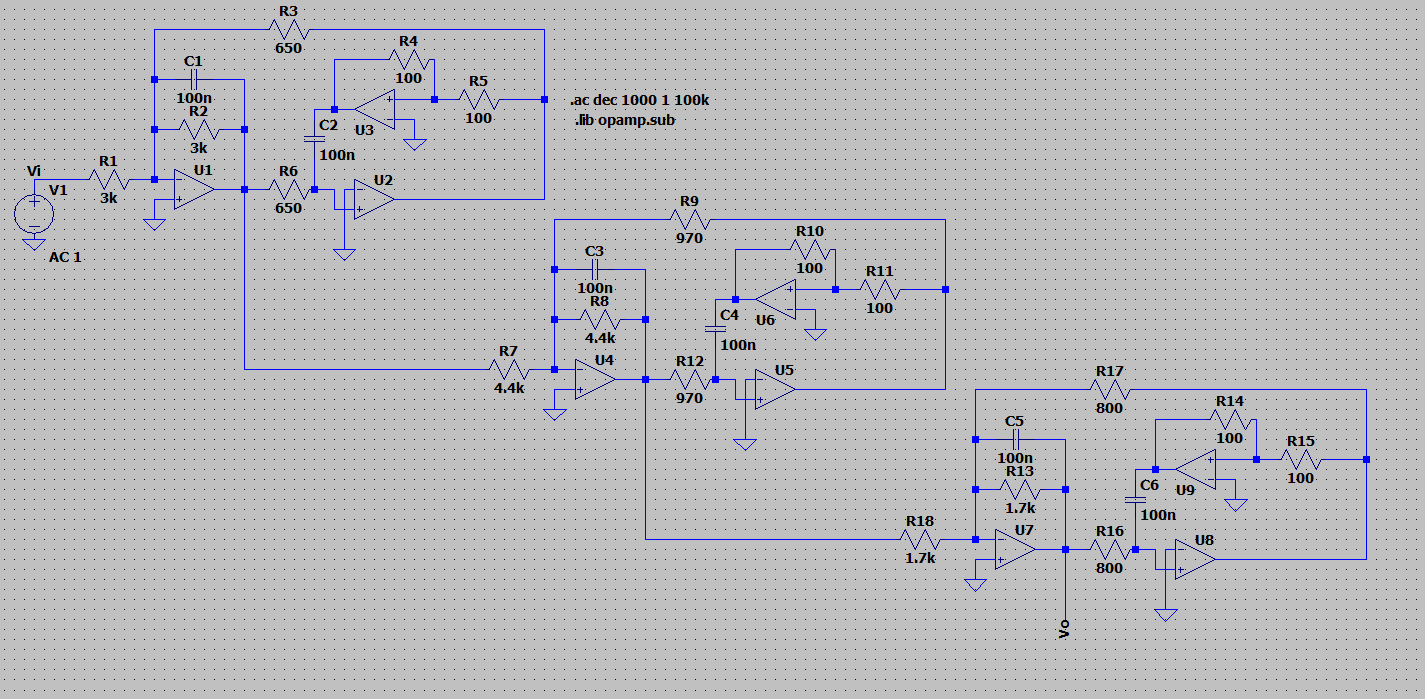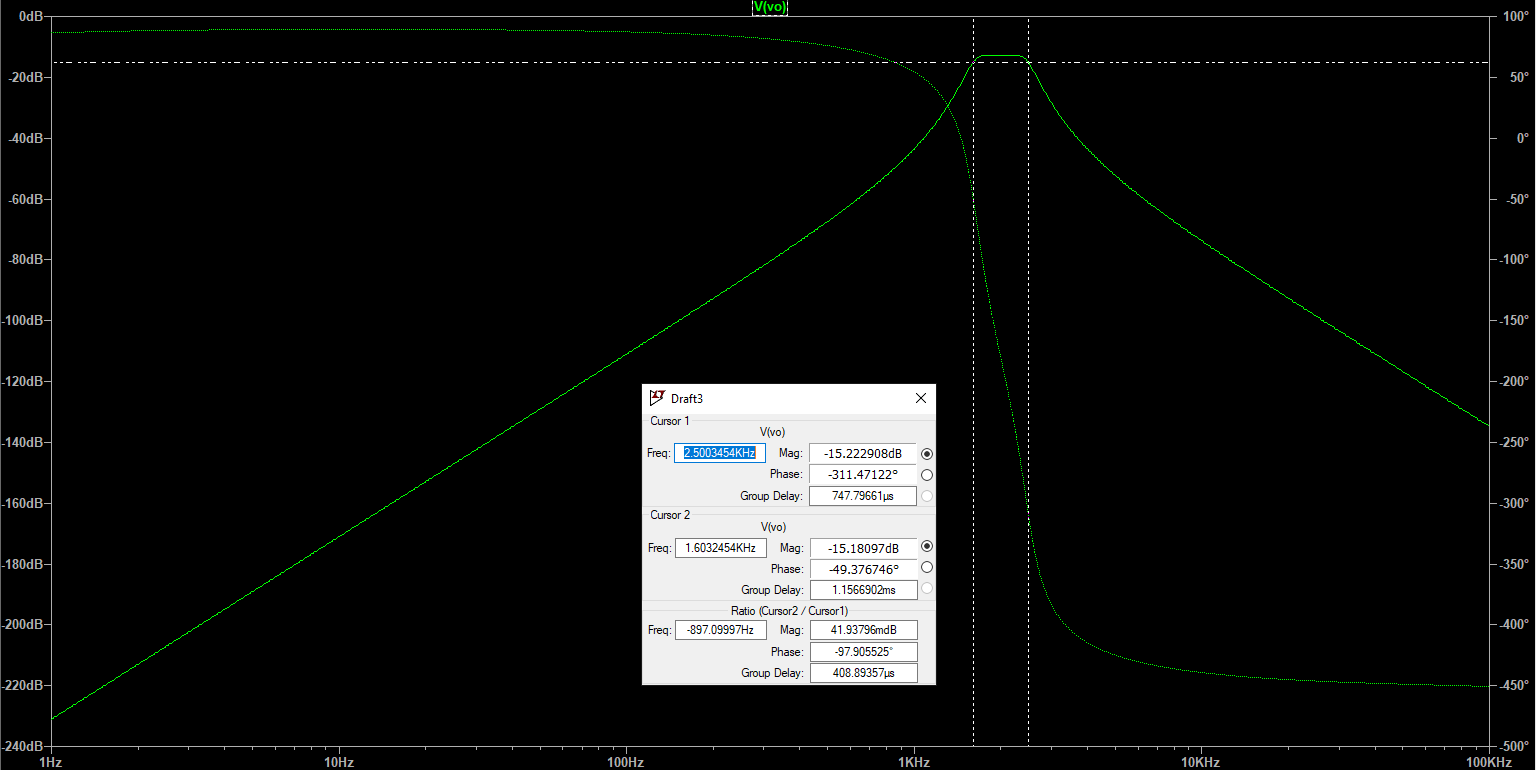